# Digital signal processing: digital signals

Digital signals are obtained by an analog-to-digital converter (ADC). An ADC does the conversion of the analog signal to digital signal by periodically **sampling** the input analog signal. 

This notebook assumes the basic knowledge of signals and systems from the reader, and focuses on the distinction between continuous-time (CT) and discrete-time (DT) representations of signals.

In [8]:
# Necessary imports for the notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
%matplotlib inline

## Sampling

A digital signal can be obtained by samling the input analog signal by an ADC.

Sampling is the process of converting a continuous-time (analog) signal into a discrete-time (digital) signal by measuring the signal's amplitude at regular intervals. The sampling rate defines how often samples are taken.

When a continuous-time signal $x(t)$ is sampled, it is represented as a discrete-time signal $x[n]$ which are defined as:

$$
x[n] \triangleq x(n\cdot T_s)
$$

where $T_s$ is the sampling rate.

To select an appropriate sampling rate for a signal, we use the [Nyquist–Shannon sampling theorem][nyquist], which provides a condition to ensure that a discrete sequence of samples can fully capture the information in a continuous-time signal with finite bandwidth. According to the theorem, the sampling rate must be at least twice the signal's bandwidth to prevent **aliasing**. We will cover an example where this condition is not satisfied and the aliasing occurs.

[nyquist]: https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem


### Example: sampling an analog signal

Our example analog signal is a sinusoidal wave

$$
x(t) = A \cdot sin\left(2 \cdot \pi \cdot f_{signal} \cdot t + \theta_{phase}\right)
$$

where $A$ is the amplitude, $f_{signal}$ is the frequency of the sine wave, $t$ is the time and $\theta_{phase}$ is the phase of the sine wave. 

* To avoid aliasing, the sampling rate for this signal must satisfy $T_s \geq 2 \cdot (\frac{1}{f_{signal}})$

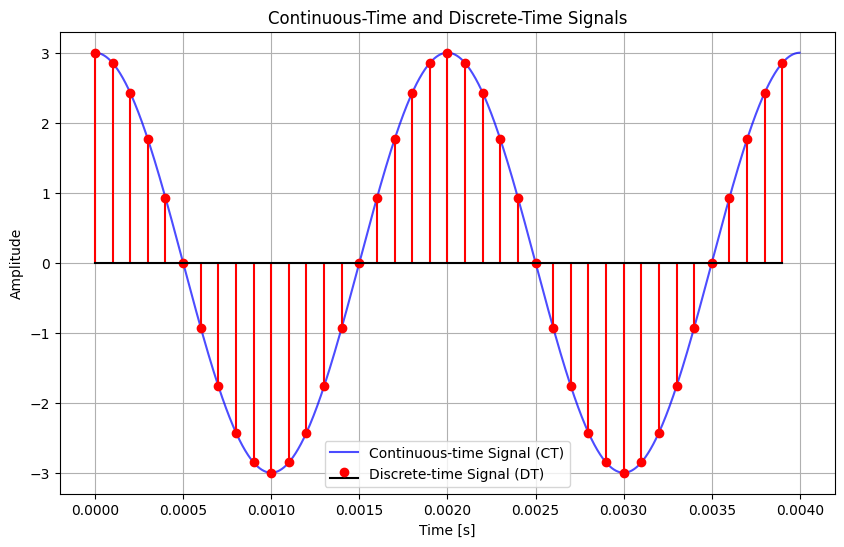

In [9]:
# Sine-wave parameters
A = 3.0 # Sine-wave amplitude
f_signal = 500 # Signal frequency
theta_phase = np.deg2rad(90) # Phase offset in radians

# Sampling parameters
# Since we are already working in the digital domain, we
# will simulate an analog signal by using a high sampling rate. This allows us
# to approximate the behavior of CT signals within our digital framework.
fs_ct = f_signal * 1000  # "Continuous" time signal sampling rate (high enough to simulate CT)
fs_dt = f_signal * 20 # Discrete time sampling rate, satisfies Nyquist criterion

# Simulation parameters
T_signal = 1/f_signal  # Period of th
duration = 2 * T_signal  # Duration of the signal in seconds

# Generate continuous-time (CT) signal
t_ct = np.linspace(0, duration, int(fs_ct * duration), endpoint=False)
signal_ct = A * np.sin(2 * np.pi * f_signal * t_ct + theta_phase)

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt = np.linspace(0, duration, int(fs_dt * duration), endpoint=False)
signal_dt = A * np.sin(2 * np.pi * f_signal * t_dt + theta_phase)

# Plotting
plt.figure(figsize=(10, 6))

# Plot CT signal
plt.plot(t_ct, signal_ct, label="Continuous-time Signal (CT)", color='b', alpha=0.7)

# Plot DT signal as stem plot (sampled version)
plt.stem(t_dt, signal_dt, linefmt='r-', markerfmt='ro', basefmt='k-', label="Discrete-time Signal (DT)")

# Labeling
plt.title("Continuous-Time and Discrete-Time Signals")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### Example: sampling an analog signal (aliasing)
Now let's see the effect of aliasing due to a sampling rate which does not satisfy Nyquist criterion:

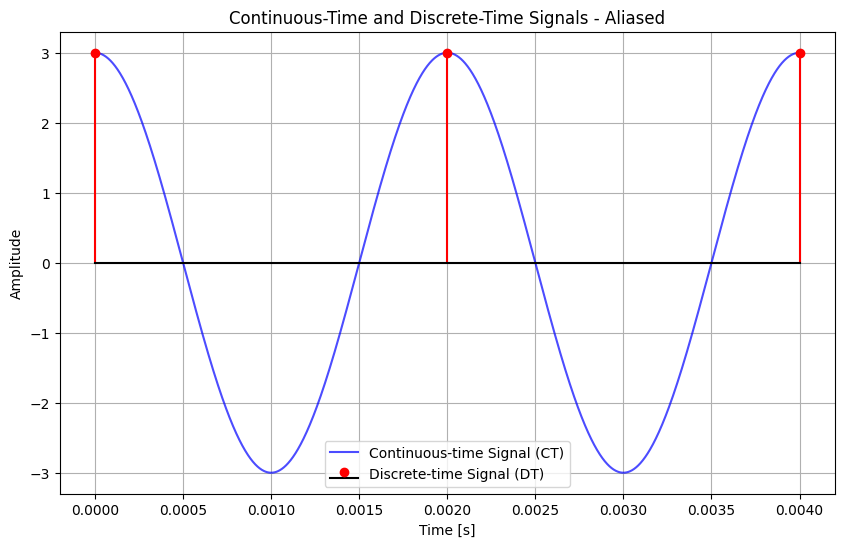

In [10]:
# Sampling parameters
fs_dt_alias = f_signal * 1 # Discrete time sampling rate, does not satisfy Nyquist criterion (i.e., fs_dt_alias / f_signal < 2)

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt_aliased = np.linspace(0, duration, 1+ int(fs_dt_alias * duration), endpoint=True)
signal_dt_aliased = A * np.sin(2 * np.pi * f_signal * t_dt_aliased + theta_phase)

# Plotting
plt.figure(figsize=(10, 6))

# Plot CT signal
plt.plot(t_ct, signal_ct, label="Continuous-time Signal (CT)", color='b', alpha=0.7)

# Plot DT signal as stem plot (sampled version)
plt.stem(t_dt_aliased, signal_dt_aliased, linefmt='r-', markerfmt='ro', basefmt='k-', label="Discrete-time Signal (DT)")

# Labeling
plt.title("Continuous-Time and Discrete-Time Signals - Aliased")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


 It is visible that the DT signal appears constant, which does not correctly represent the input analog CT signal. We call this DT signal **aliased**.

## Frequency domain representation of discrete-time signals

After the discrete-time signal $x[n]$ is obtained, one of the first steps to analyze the signal is to inspect the frequency content of the signal. **Fourier Transform** is a powerful mathematical tool used to analyze the frequency content of signals. For discrete-time signals, **Discrete-Time Fourier Transform (DTFT)** and **Discrete Fourier Transform (DFT)** are used.

1. **Discrete-Time Fourier Transform (DTFT)**: DTFT is a mathematical transformation that converts a discrete-time signal into a **continuous** frequency spectrum. It allows us to analyze the frequency content of a sequence of discrete samples.

    For a discrete-time signal $x[n]$, the DTFT is defined as:
    $$
    X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
    $$
    where $X(e^{j\omega})$ is the frequency representation of the discrete signal and $\omega$ is the angular frequency in radians per sample.

2. **Discrete Fourier Transform (DFT)**: DFT is the **sampled version of the DTFT**. It converts a finite-length sequence of discrete-time samples into a finite number of frequency components.

    For a discrete-time signal $ x[n] $ of length $ N $, the DFT $X[k]$ is given by:
    $$
    X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \ldots, N-1
    $$

    where  X[k] $ represents the frequency components sampled from the DTFT, $k$ represents the discrete frequency index.

3. **Relation between DTFT and DFT**: The DFT samples the DTFT at specific frequencies. If $ X(e^{j\omega}) $ is the DTFT of a signal, the DFT can be thought of as evaluating this DTFT at the frequencies $ \omega_k = \frac{2\pi k}{N} $ for $ k = 0, 1, \ldots, N-1 $.

    - The relationship between the DTFT and the DFT can be summarized as
    follows: 
        $$
        X[k] = X\left(e^{j \frac{2\pi k}{N}}\right)
        $$

    - Both the DTFT and DFT are periodic, but the DTFT provides a continuous
      representation, while the DFT results in a finite number of discrete
      frequency components.

    - In digital domain, The DFT can be computed efficiently using the Fast Fourier Transform (FFT) algorithm. For a finite-length signal (which is common in practice), the DFT provides a good approximation of the DTFT, which is usually computatioanally costly to compute.

**Example:** We will now inspect the DTFT and the DFT frequency content of the sampled sine wave signal $x[n]$. 

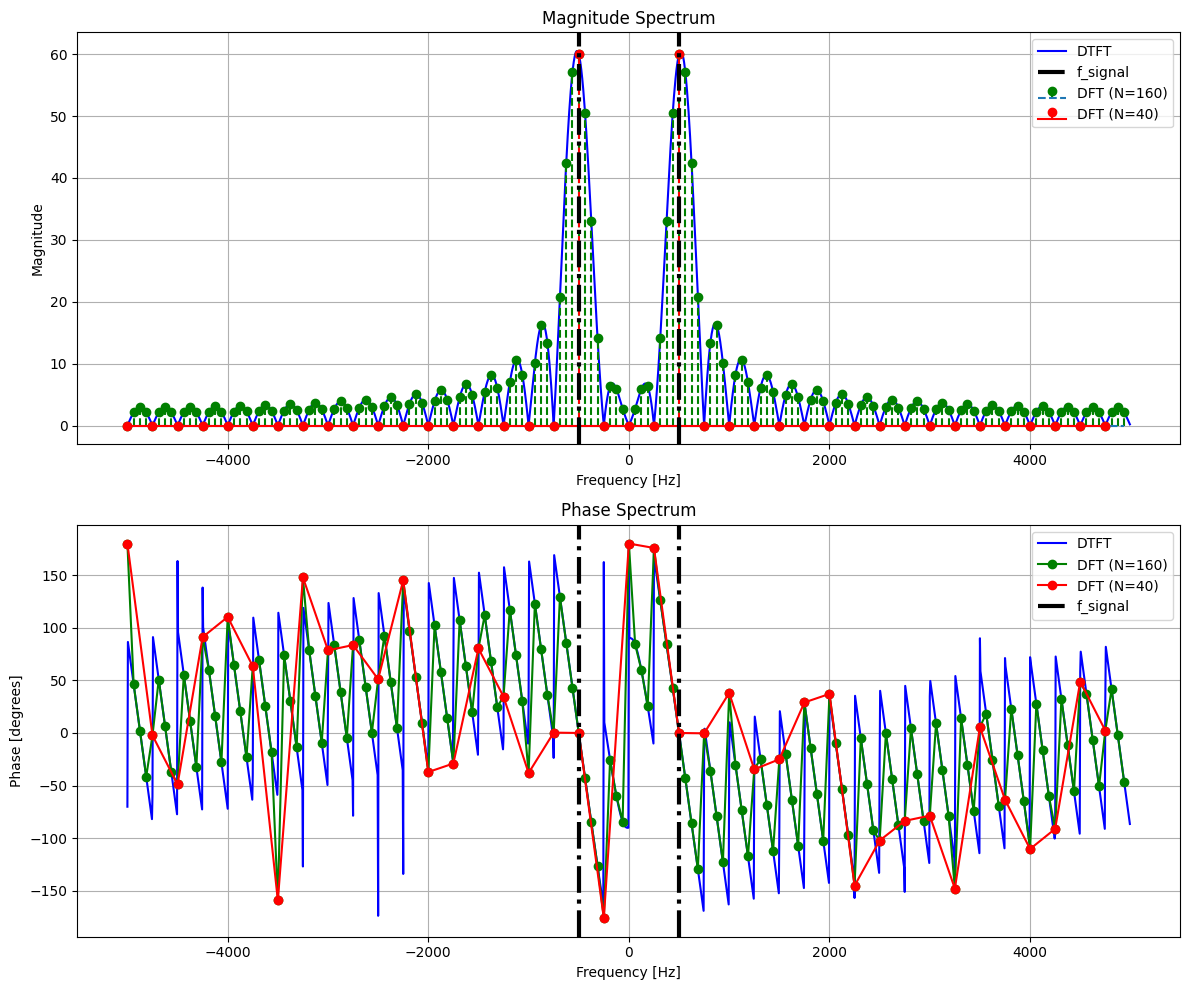

In [11]:
# Sampling parameters
fs_ct = f_signal * 1000  # "Continuous" time signal sampling rate (high enough to simulate CT)
fs_dt = f_signal * 20 # Discrete time sampling rate, satisfies Nyquist criterion

# Simulation parameters
T_signal = 1/f_signal  # Period of the signal in seconds
duration = 2 * T_signal  # Duration of the signal in seconds

# Generate continuous-time (CT) signal
t_ct = np.linspace(0, duration, int(fs_ct * duration), endpoint=False)
signal_ct = A * np.sin(2 * np.pi * f_signal * t_ct + theta_phase)

# Generate discrete-time (DT) signal by sampling the CT signal
t_dt = np.linspace(0, duration, int(fs_dt * duration), endpoint=False)
signal_dt = A * np.sin(2 * np.pi * f_signal * t_dt + theta_phase)


# Compute the DTFT for the discrete-time signal
N_DTFT = len(signal_ct)  # Approximate continuous DTFT spectrum by calculating DFT with very large number of samples
N_DFT = len(signal_dt)
N_DFT_HIGHERRES = N_DFT * 4

def fft(signal, fs, N):
    X = np.fft.fftshift(np.fft.fft(signal, n=N))
    frequencies = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))
    X_mag = np.abs(X)
    X_phase = np.angle(X, deg=True)
    return X, X_mag, X_phase, frequencies

X_dtft, mag_dtft, phase_dtft, frequencies_dtft = fft(signal_dt, fs_dt, N_DTFT) # highest resolution
X_fft, mag_fft, phase_fft, frequencies_fft = fft(signal_dt, fs_dt, N_DFT) # default resolution
X_fft_higherres, mag_fft_higherres, phase_fft_higherres, frequencies_fft_higherres = fft(signal_dt, fs_dt, N_DFT_HIGHERRES) # higher sampling rate of the DTFT

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
# Plot magnitude of DTFT
ax[0].plot(frequencies_dtft, mag_dtft, label='DTFT', color='blue')
ax[0].stem(frequencies_fft_higherres, mag_fft_higherres, linefmt='g--', basefmt='--', label=f"DFT (N={N_DFT_HIGHERRES})")
ax[0].stem(frequencies_fft, mag_fft, linefmt='r-.', markerfmt='ro', basefmt='r-', label=f"DFT (N={N_DFT})")
ax[0].axvline(x=f_signal, color='black', linestyle='-.', linewidth=3,label='f_signal')
ax[0].axvline(x=-f_signal, color='black', linestyle='-.', linewidth=3)
ax[0].set_title('Magnitude Spectrum')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude')
ax[0].legend()
ax[0].grid()

# Plot phase of DTFT
ax[1].plot(frequencies_dtft, phase_dtft, label='DTFT', color='blue')
ax[1].plot(frequencies_fft_higherres, phase_fft_higherres, label=f"DFT (N={N_DFT_HIGHERRES})", color='green', marker='o')
ax[1].plot(frequencies_fft, phase_fft, label=f"DFT (N={N_DFT})", color='red', marker='o')
ax[1].axvline(x=f_signal, color='black', linestyle='-.', linewidth=3,label='f_signal')
ax[1].axvline(x=-f_signal, color='black', linestyle='-.', linewidth=3)
ax[1].set_title('Phase Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [degrees]')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


Note that a pure sine wave would only have non-zero Fourier Transform coefficients at $f = f_{signal}$ ideally, but it requires an infinite amount of samples. In practice, we can treat the finite length signal $x[n]$ as a signal formed by windowing a pure sinusoidal signal by a window with length $N$, then $x[n] = x_{sine}[n] \cdot w[n]$, where w[n] is a rectangular window defined by:

$$
w[n] = 
\begin{cases} 
1 & \text{if } 0 \leq n < N-1 \\
0 & \text{else } \\
\end{cases}
$$

Since rectangular window has a DTFT in the shape of the sinc function, the overall DTFT is sinc wave shifted by $f_{signal}$ and $-f_{signal}$



### Time-Frequency spectrogram using Short-time Fourier Transform (STFT)

We will now inspect the frequency content of the following DT signal

$$
x[n] = 
\begin{cases} 
sin(2 \cdot \pi \cdot f_1 \cdot T_s \cdot n) & \text{if } 0 \leq n < T_1 \\
0 & \text{if } T_1 \leq n < T_2 \\
sin(2 \cdot \pi \cdot f_2 \cdot T_s \cdot n) & \text{if } T_2 \leq n < T_3 \\
\end{cases}
$$

which is defined as a piecewise signal where each piece has a different frequency content.

Let's first calculate the DFT to analyze the frequency content

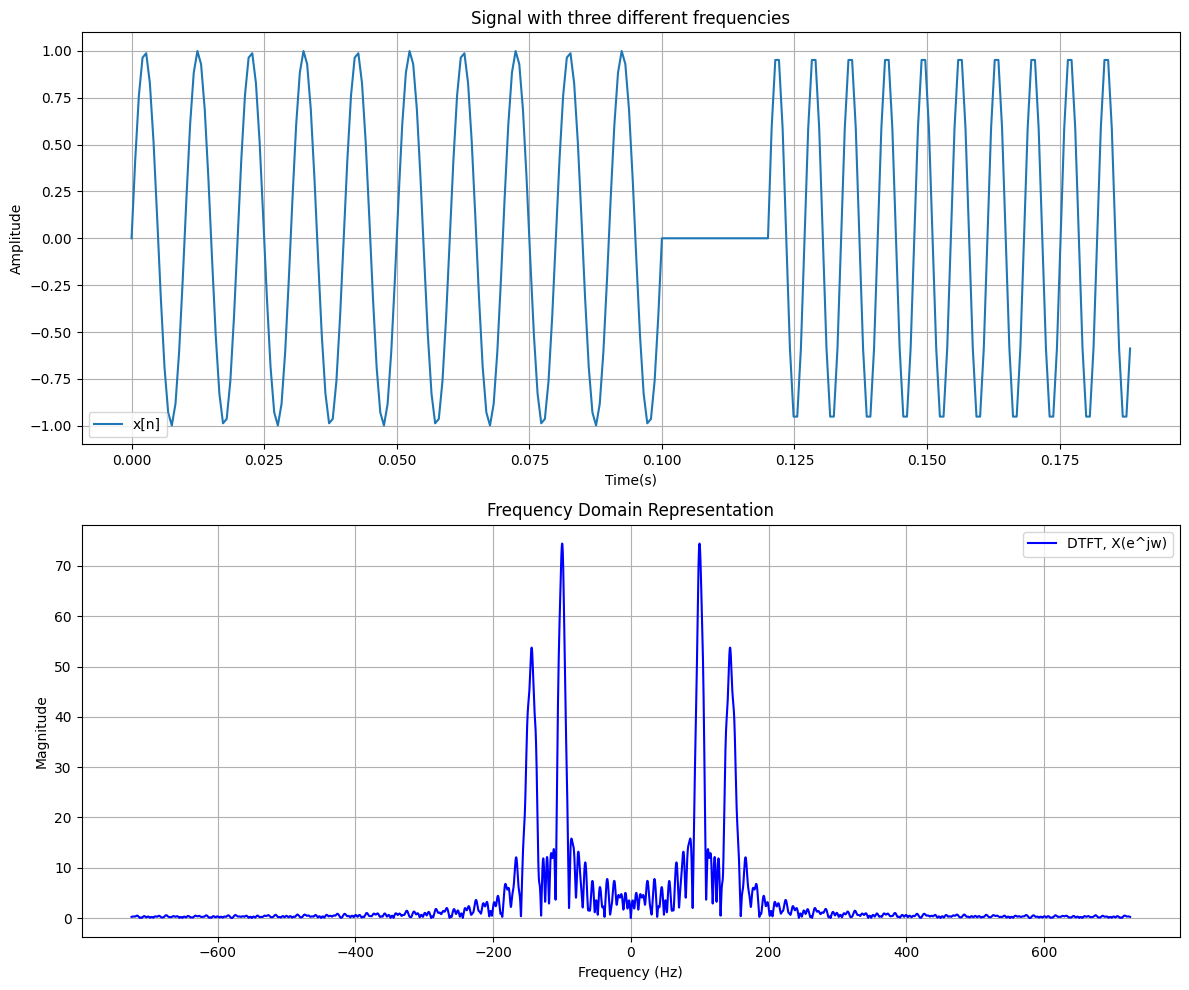

In [12]:
# Create the signal

f1 = 100  # first signal frequency
f2 = f1 * 1.45 # last signal frequency
f_sampling = f2 * 10  # Sampling frequency
duration_1 = (1 / f1) * 10  # Duration of the first signal in seconds
duration_2 = (1 / f1) * 2  # Duration of the second signal in seconds
duration_3 = (1 / f2) * 10  # Duration of the third signal in seconds

# Time index samples
samples_1 = np.linspace(0, duration_1, int(f_sampling * duration_1), endpoint=False)
samples_2 = np.linspace(0, duration_2, int(f_sampling * duration_2), endpoint=False)
samples_3 = np.linspace(0, duration_3, int(f_sampling * duration_3), endpoint=False)

# Signal samples
sig_1 = np.sin(2 * np.pi * f1 * samples_1)
sig_2 = np.zeros(len(samples_2),)
sig_3 = np.sin(2 * np.pi * f2 * samples_3)

# Create the final signal
signal_all = np.concatenate((sig_1, sig_2, sig_3))
time_axis = np.arange(0, len(signal_all)*(1/f_sampling), (1/f_sampling))

# Compute the DFT
_, mag_dtft, phase_fft_higherres, frequencies_dtft = fft(signal_all, f_sampling, 200 * len(signal_all))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the time-domain signal
ax1.plot(time_axis, signal_all, label= "x[n]")
ax1.set_title("Signal with three different frequencies")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")
ax1.legend()
ax1.grid(True)

# Plot the frequency-domain representation
ax2.plot(frequencies_dtft, mag_dtft, label='DTFT, X(e^jw)', color='blue')
ax2.set_title("Frequency Domain Representation")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

As it is observed from the magnitude response, all the frequencies are mixed in the signal and there are some *frequency artifacts* due to abrupt changes in the signal.

But if the overall signal is considered in shorter time periods, the frequency content of the signal represents the local behaviour of the signal better. For that purpose, we utilize time-frequency spectrograms . A **spectrogram** is a visual representation of the frequency content of a discrete-time signal as it varies over time. It provides insight into how the frequency spectrum of a signal evolves, making it invaluable for analyzing non-stationary signals, such as audio.

To create a spectrogram, the **Short-Time Fourier Transform (STFT)** is applied. The STFT divides the signal into overlapping segments and computes the DFT for each segment:

The Short-Time Fourier Transform (STFT) of a discrete-time signal $x[n]$ is defined as:

$$
STFT\{x[n]\} = X[n, k] = \sum_{m=-\infty}^{\infty} x[m] w[n - m] e^{-j \frac{2 \pi}{N} k m}
$$

where $x[n]$ is the input discrete-time signal, $w[n - m]$ is the window function centered at sample $n$.



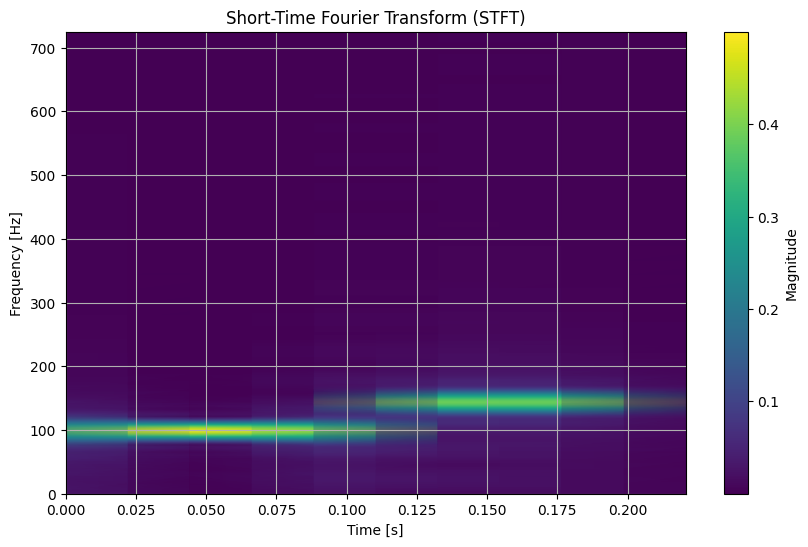

In [6]:
# Calculate STFT
f, t, Zxx = stft(
    signal_all,
    fs=f_sampling,
    nperseg=128, # Window length
    nfft=20*len(signal_all))

# Plot the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('Short-Time Fourier Transform (STFT)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.grid()
plt.show()

With the spectrogram view, local stationary of the signal and the change of the frequency content over time is more visible.